In [ ]:
#supress Warnings

import warnings 
warnings.filterwarnings('ignore')

#import numpy and pandas package
import numpy as np
import pandas as pd

#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sales_data = pd.DataFrame(pd.read_csv("advertising.csv"))
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**Data Inspection**

In [ ]:
sales_data.shape

(200, 4)

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**Data** **Cleaning**

In [ ]:
#Checking Null Values
sales_data.isnull().sum()*100/sales_data.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [ ]:
#there are no NULL values in the dataset, therjefore it is clean

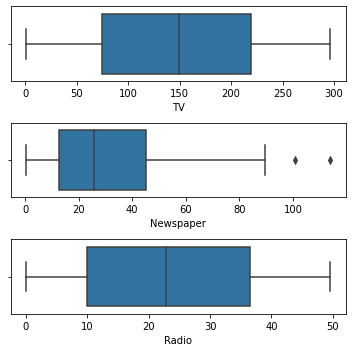

In [ ]:
#Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(sales_data['TV'], ax = axs[0])
plt2 = sns.boxplot(sales_data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(sales_data['Radio'], ax = axs[2])
plt.tight_layout()

In [ ]:
#there are no considerable outliers present in the data

**Exploratory Data Analysis**

Univariate Analysis

Sales (Target Variable)

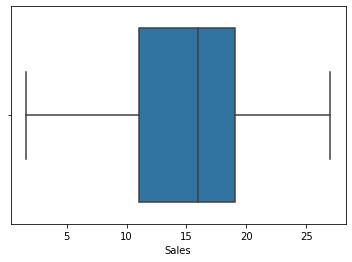

In [ ]:
sns.boxplot(sales_data['Sales'])
plt.show()

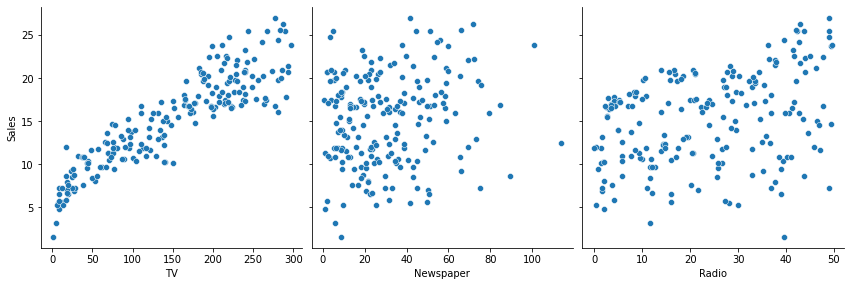

In [ ]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(sales_data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

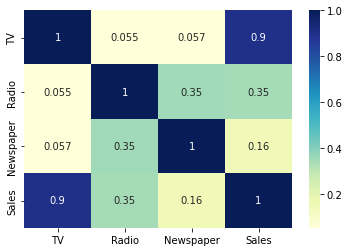

In [ ]:
# Let's see the correlation between different variables.
sns.heatmap(sales_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

*As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.*


# Manual Simple Linear Regression

In [ ]:
#X is usually the independant  features and Y is dependant, assiging variables accordingly (using only Sales and TV)
x = sales_data['TV']
y = sales_data['Sales']

In [ ]:
#Determine and assign the appropriate mean of both columns
mean_x = x.mean()
mean_y = y.mean()

In [ ]:
#finding the slope of our line y = mx + c. In data science it is y = b0 + b1.x
#m is the slope c is the intercept

x1 = x - mean_x
y1 = y - mean_y

n = len(x)

In [ ]:
#Calculating the slope and assigning it to m
#m = [Σ(x-x̅).(y-ȳ)]/Σ(x-x̅)^2
m = (x1 * y1).sum()/(x1 ** 2).sum()
m

0.055464770469558854

In [ ]:
#Calculating the intercept and assigning it to c
#c = ȳ - (m.x̅)
c = mean_y - (m*mean_x)
c

6.974821488229894

In [ ]:
#Predicted values assigned to Y. Reffered to as 'ŷ' in data science. 
Y = c +(m*x)
Y

0      19.737265
1       9.443004
2       7.928816
3      15.377734
4      17.002852
         ...    
195     9.093576
196    12.199603
197    16.792086
198    22.704630
199    19.848195
Name: TV, Length: 200, dtype: float64

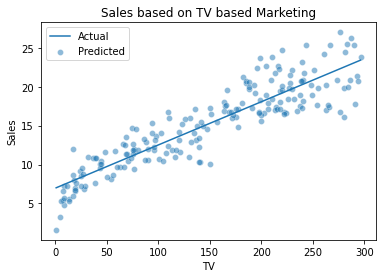

In [ ]:
#Data Visualizsation
ax = sns.scatterplot(data=sales_data, x=x, y=y, alpha=0.5).set(title = 'Sales based on TV based Marketing')
#Plot line with the predicted values 'Y'
sns.lineplot(x,Y) 
plt.gca().legend(('Actual','Predicted'))

In [ ]:
#Residuals are the difference between the actual values and observed values.
#Assign Residuals to 'e'
e = y - Y

#Square the residuals and sum them up to attain the Residual Sum of Squares 
RSS = (e ** 2).sum()

In [ ]:
#R2(R squared) is a performance metric to see how our model is, higher R2 the better the accuracy
# 1 - RSS/TSS
R2 = 1 - RSS/((y1)**2).sum()
R2

0.8121757029987414

**Sales = 6.974 + 0.0554×TV** *and model accuracy is 81.21%*

In [ ]:
#we can try simple linear regression using existing libraries in python

# Model Builind using sklearn

In [93]:
#defining dependant and independant variables (Sales and TV)
X= sales_data['TV']
y = sales_data['Sales']

In [94]:
#test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [95]:
import statsmodels.api as sm

In [96]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [97]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    7.162276
TV       0.054434
dtype: float64

In [98]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.0
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           1.73e-59
Time:                        09:57:20   Log-Likelihood:                -353.74
No. Observations:                 160   AIC:                             711.5
Df Residuals:                     158   BIC:                             717.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1623      0.358     19.997      0.0

Looking at some key statistics from the summary
The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance
1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.813
Meaning that 81.3% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.



The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

**Sales=7.162+0.054×TV**
With a R value of 0.813

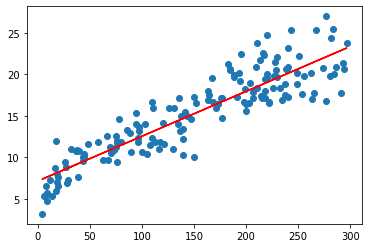

In [99]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.162 + 0.054*X_train, 'r')
plt.show()